In [90]:
import pandas as pd
import numpy as np
import json
import csv
import os, json
import plotly.express as px
from datetime import datetime
import time
import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plot

In [91]:
event_file = "data/events_log.json-1581525525.json"
godot_data = pd.read_json(event_file, lines=True)
message_df = pd.DataFrame()
message_df = godot_data[godot_data['Event_Type'].str.contains('Status-check')]
message_df['Time'] = pd.to_datetime(message_df['Time'],unit='s')
message_df['Correct'] = message_df['Correct Pieces'].astype('str') 
message_df['Incorrect'] = message_df['Incorrect pieces'].astype('str') 
#sprint(message_df.dtypes)
message_df['Correct'] = message_df['Correct'].str.replace('\W', '')
message_df['Incorrect'] = message_df['Incorrect'].str.replace('\W', '')
message_df.insert(0, 'Instance', range(1, 1 + len(message_df)))
df = pd.DataFrame()
#df = message_df[['Instance','Time','Correct Pieces','Incorrect pieces','Correct','Incorrect']]
df = message_df[['Instance','Time','Correct','Incorrect']]
df.to_csv("Status_check.csv")
print(df)

C:\Users\Garima-PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Garima-PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Garima-PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

     Instance                Time     Correct Incorrect
115         1 2020-02-12 16:44:00         PXU   LZVYWFN
172         2 2020-02-12 16:46:17        PXUN       YWF
188         3 2020-02-12 16:47:37        PXUN         L
201         4 2020-02-12 16:48:22        PXUN         Z
220         5 2020-02-12 16:49:33       PXUNI        WL
237         6 2020-02-12 16:50:24       PXUNI       YTZ
271         7 2020-02-12 16:51:53      PXUNIW        TY
280         8 2020-02-12 16:52:18     PXUNIWT         Y
307         9 2020-02-12 16:53:25     PXUNIWT       FYZ
312        10 2020-02-12 16:53:38     PXUNIWT        YZ
369        11 2020-02-12 16:56:39  PXUNIWTZVF          


In [92]:
df['Correct_Length']=df['Correct'].str.len()
df['Incorrect_Length']=df['Incorrect'].str.len()
#print(df)
final_df= df
print(final_df)

     Instance                Time     Correct Incorrect  Correct_Length  \
115         1 2020-02-12 16:44:00         PXU   LZVYWFN               3   
172         2 2020-02-12 16:46:17        PXUN       YWF               4   
188         3 2020-02-12 16:47:37        PXUN         L               4   
201         4 2020-02-12 16:48:22        PXUN         Z               4   
220         5 2020-02-12 16:49:33       PXUNI        WL               5   
237         6 2020-02-12 16:50:24       PXUNI       YTZ               5   
271         7 2020-02-12 16:51:53      PXUNIW        TY               6   
280         8 2020-02-12 16:52:18     PXUNIWT         Y               7   
307         9 2020-02-12 16:53:25     PXUNIWT       FYZ               7   
312        10 2020-02-12 16:53:38     PXUNIWT        YZ               7   
369        11 2020-02-12 16:56:39  PXUNIWTZVF                        10   

     Incorrect_Length  
115                 7  
172                 3  
188                 1  
201

C:\Users\Garima-PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Garima-PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



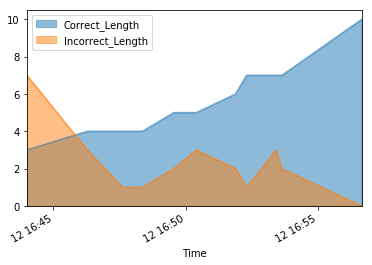

In [94]:
#print(df)
temp_data =df[['Correct_Length','Incorrect_Length']]
#print(temp_data)
dataFrame   = pd.DataFrame(temp_data);
dataFrame.index =df['Time']
#print(dataFrame.index)
dataFrame.plot(kind='area', stacked=False)
plot.show(block=True);